### Author: Jason Weidner
### Date: Summer 2020
### Course: Intro to Data Science Algorithms
### Project: Analysis of Microsoft Malware Infection Data from Kaggle, with GaTech

In [130]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Loading the data

In [131]:
#https://www.kaggle.com/theoviel/load-the-totality-of-the-data
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

def reduce_mem_usage(df, verbose=True):
    """
    Note from Jason: This function looks at each column and changes the datatype based on how big the max 
    and min data values are. By making the datatype as small as possible, we can save the amount of memory being used
    when the data is loaded.
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [132]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = [c for c,v in dtypes.items() if v in numerics]
categorical_columns = [c for c,v in dtypes.items() if v not in numerics]

In [133]:
train = pd.read_csv("../new_train.csv", dtype=dtypes) #importing the data into memory

In [134]:
train = reduce_mem_usage(train) #changing datatypes to save memory

Mem. usage decreased to 2303.37 Mb (5.2% reduction)


In [135]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])

In [136]:
stats_df.sort_values('Percentage of missing values', ascending=False)[:10]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
29,PuaMode,2,99.974119,99.974119,category
69,Census_IsFlightingInternal,2,83.044030,83.044030,float16
72,Census_ThresholdOptIn,2,63.524472,63.524472,float16
76,Census_IsWIMBootEnabled,2,63.439038,63.439038,float16
30,SMode,2,6.027686,93.928812,float16
81,Wdft_IsGamer,2,3.401352,69.205344,float16
54,Census_InternalBatteryNumberOfCharges,41087,3.012448,56.643094,float32
70,Census_IsFlightsDisabled,2,1.799286,98.199728,float16
33,Firewall,2,1.023933,96.856251,float16
47,Census_TotalPhysicalRAM,3446,0.902686,45.894971,float32


This table is a recreation of the work original presented here (https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated). In this case the training data has already been processed with my other "data processing" notebook. I've included the table here to show how several of the columns are missing large portions of data.

These columns are missing >30% of the values and will be dropped:
- PuaMode, Census_IsFlightingIdentifier, Census_ThresholdOptIn, Census_IsWINBoostEnabled

Without prior data processing, the following columns have more than 30% data missing (data not shown):
- PuaMode, Census_ProcessorClass, DefaultBrowserIdentifier, Census_IsFlightingIdentifier, Census_InternalBatteryType, Census_ThresholdOptIn, Census_IsWINBoostEnabled, SmartScreen and OrganizedIdentifier

### Removing columns where >30% of data is missing

In [137]:
good_cols1 = list(train.columns)
for col in train.columns:
    rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.7:
        good_cols1.remove(col)

In [138]:
print(len(good_cols1)) # this is the number of features being considered after dropping sparse column data

53


### Size of training dataset

In [139]:
train[good_cols1].shape # so we can see how many rows and columns of data we've got

(8921483, 53)

### Correlations Between Features

If two columns are highly correlated, then we don't need to include one of them. What follows is an analysis that shows the correlation between every pair of columns of data in the training dataset. At the end I drop half of the columns that were correlated.

In [140]:
correlated_features = train[good_cols1].corr().abs()
correlated_features = correlated_features.unstack().sort_values(kind="quicksort", ascending = False)

In [141]:
c = zip(*correlated_features.iteritems())
c = list(c)

In [142]:
corr_threshold = 0.59 #I arbitrarily chose 60% as the threshold
significantly_correlated = []
for i in range(0,len(c[0])):
    if c[1][i] < 1.0 and c[1][i] > corr_threshold:
        if(i%2 == 0): # filter out duplicates
            significantly_correlated.append([c[1][i], c[0][i][0], c[0][i][1]])

In [143]:
len(significantly_correlated) # total number of pairs that are highly correlated (using our threshold)

5

In [144]:
for cor in significantly_correlated:
    print(cor)

[0.9611829484272336, 'Census_OSUILocaleIdentifier', 'Census_OSInstallLanguageIdentifier']
[0.9015470991239956, 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalPrimaryDisplayResolutionHorizontal']
[0.9011534262653258, 'OsBuild', 'Census_OSBuildNumber']
[0.6212026407579673, 'OsBuild', 'IeVerIdentifier']
[0.5978544763593905, 'Census_TotalPhysicalRAM', 'Census_ProcessorCoreCount']


This is the list of pairs of columns that are highly correlated, including their correlation coefficient.

### Graphically Show Heatmap of Correlated Features
#### Confirms ~5 is a reasonable number to drop

I wanted to see if 60% was a reasonable cut-off. So I created a heatmap showing the correlation coefficients of all pairs of columns, so I could very quickly see if ~5 columns was about the right number to drop. It turns out that it is a reasonable first pass.

Note: Only look at colors in one half of the heatmap -- either the bottom left triangle or the upper right triangle.

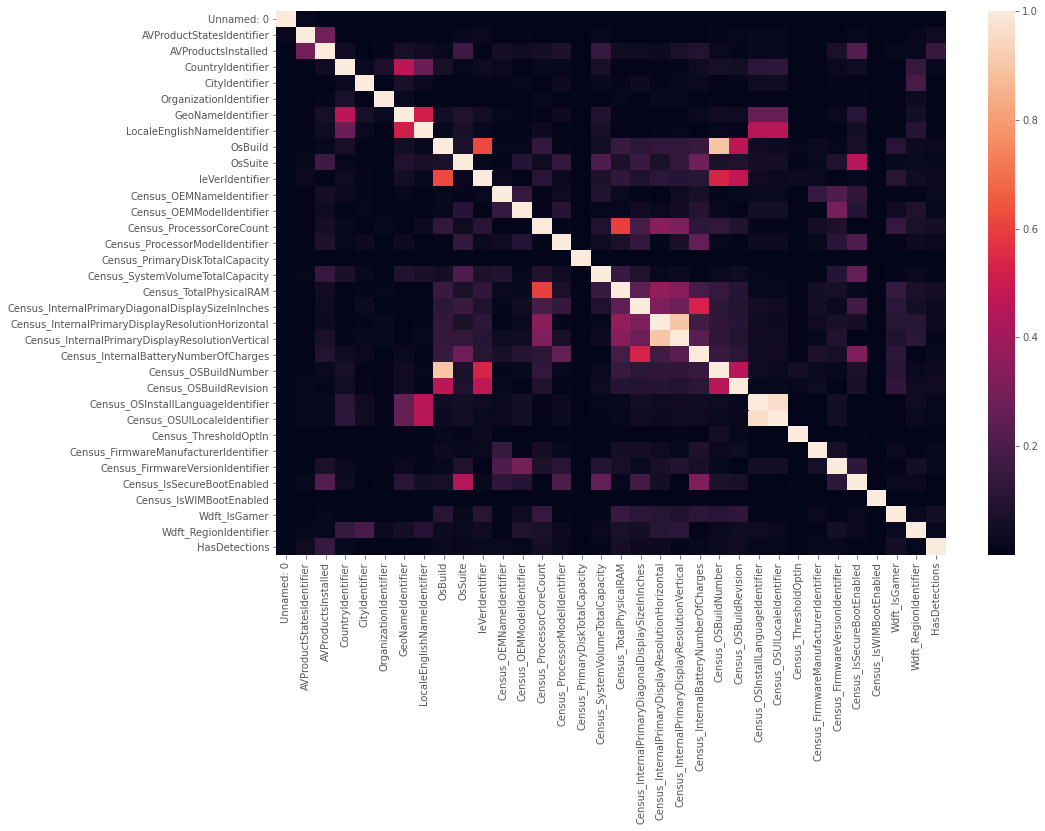

In [145]:
plt.figure(figsize=(15,10))
sns.heatmap(train[good_cols1].corr().abs()) #plot as a heatmap

In [146]:
good_cols2 = good_cols1 #I didn't want to get rid of my legacy list of good column names, so I'm going to drop correlated features from good_cols2

In [147]:
print("Number of good columns before dropping correlated features:", len(good_cols1))
for cor in significantly_correlated:
    if(cor[1] in good_cols2):
        good_cols2.remove(cor[1])
print("Number of good columns after dropping correlated features:", len(good_cols2))

Number of good columns before dropping correlated features: 53
Number of good columns after dropping correlated features: 49


In [148]:
train = train[good_cols2] # save the results to the train variable

In [149]:
train = train.dropna() #critical step for creating models
train.shape # shows us how many rows of data we've still got

(3170053, 49)

## Labels

In [150]:
train['HasDetections'].value_counts() # examine how many labels we have of each type. They are evenly split.

0    1615459
1    1554594
Name: HasDetections, dtype: int64

# KNearest Neighbors

K Nearest Neighbors is a clustering algorithm that classifies a data point on its nearest neighbors. The number of neighbors used ot classify the data point depends on user input, and is called the k-nearest neighbors. 

The algorithm is fast and it is a bit arbitrary on what k-value would result in the best classification outcome so I've used a range (1-10) of k-values and reported the mean result. The mean is calculated by repeating the runs (handled internally by the library).

In [151]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [152]:
sample = train.sample(n = 20000) # we don't need to create a model using 3M data points. Here is 20k.
sample.shape

(20000, 49)

In [161]:
ignore_cols = ['HasDetections', 'MachineIdentifier'] #, 'Census_InternalBatteryNumberOfCharges', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity']
ignore_types = []
x_train_cols = []
for col in good_cols2[1:]:    
    if col not in ignore_cols:
        if dtypes[col] not in ignore_types:
            x_train_cols.append(col)
print("len(good_cols2):", len(good_cols2), "len(x_train_cols):", len(x_train_cols))

len(good_cols2): 49 len(x_train_cols): 46


In [162]:
knn = neighbors.KNeighborsClassifier()
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options);
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision');
grid.fit(sample[ x_train_cols ], sample["HasDetections"]);

In [163]:
ksize = 0
for kscore in grid.cv_results_['mean_test_score']:
    print("Nearest", ksize, "neighbors score:", kscore)
    ksize += 1
    if ksize == 10:
        break

Nearest 0 neighbors score: 0.5063642644970974
Nearest 1 neighbors score: 0.5063642644970974
Nearest 2 neighbors score: 0.5190501160768115
Nearest 3 neighbors score: 0.5063642644970974
Nearest 4 neighbors score: 0.5136770570507103
Nearest 5 neighbors score: 0.5113163628533621
Nearest 6 neighbors score: 0.5214597956542668
Nearest 7 neighbors score: 0.5132332133211863
Nearest 8 neighbors score: 0.5163386572478043
Nearest 9 neighbors score: 0.5169175137584544


Unfortunately you can see that no matter the k-value I used (within this range), the result is always ~50%. That means the clustering algorithm is providing results similar to just guessing if a computer has an infection.

# KMeans Clustering

Kmeans is an algorithm where a user defines how many clusters (called 'k-clusters') they would like to use to separate the data. The algorithm then iteratively finds where the cluster centers are located. If the input data has 50 columns of data, the cluster centers are in a 50-dimensional space. Test data are then classified by claculating which cluster center is closest.

In what follows I've done KMeans with 2 clusters -- presumably for infected and non-infected. And then I've tested to see how well it does at predicting whether computers are infected or not. This approach would work if, for whatever reason, the characteristics of infected computers were largely similar to one another and dissimilar to uninfected computers (across the feature space being used).

In [164]:
from sklearn.cluster import KMeans

In [165]:
ignore_cols = ['MachineIdentifier']
x_train_cols1 = []
for col in good_cols2[1:]:    
    if col not in ignore_cols:
        x_train_cols1.append(col)
print("len(good_cols2):", len(good_cols2), "len(x_train_cols):", len(x_train_cols1))

len(good_cols2): 49 len(x_train_cols): 47


In [166]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(sample[x_train_cols1])
    result = (kmeans.predict(sample[x_train_cols1]) == sample["HasDetections"]).mean()
    print("number of clusters:", i, "average correct:", result)

number of clusters: 1 average correct: 0.5071
number of clusters: 2 average correct: 0.51165
number of clusters: 3 average correct: 0.44
number of clusters: 4 average correct: 0.166
number of clusters: 5 average correct: 0.2421
number of clusters: 6 average correct: 0.19635
number of clusters: 7 average correct: 0.1447
number of clusters: 8 average correct: 0.18335
number of clusters: 9 average correct: 0.15475


Here you can see that I've tested several different cluster numbers for classification. If there is only 1 cluster we would be guessing whether or not a computer is infected -- so the rate is 50%, as expected. With 2 cluster centers, the result is worse -- and it is downhill from there as we increase the number of clusters.